### Longest Repeating Character Replacement
---
You are given a string s and an integer k. You can choose any character of the string and change it to any other uppercase English character. You can perform this operation at most k times.

Return the length of the longest substring containing the same letter you can get after performing the above operations.

|Input|Output|Explanation|
|:--|:--|:--|
|s = "ABAB", k = 2|4|Replace the two 'A's with two 'B's or vice versa.|
|s = "AABABBA", k = 1|4|Replace the one 'A' in the middle with 'B' and form "AABBBBA". The substring "BBBB" has the longest repeating letters, which is 4.|
>$Constraints:$  
>- $1 <= s.length <= 10^5$
>- $s$ $consists$ $of$ $only$ $uppercase$ $English$ $letters.$
>- $0 <= k <= s.length$

In [1]:
import java.time.Duration;
import java.time.Instant;

class Solution {
    public int characterReplacement(String s, int k) {
        Map<Character, Integer> map = new HashMap<>(); 
        int left = 0, maxRepeat = 0, maxWindow = 0;

        for(int right = 0; right < s.length(); right++) {
            char ch = s.charAt(right);
        
            map.put(ch, map.getOrDefault(ch, 0) + 1);
            
            maxRepeat = Math.max(maxRepeat, map.get(ch));

            if(right - left + 1 - maxRepeat > k) {
                char remove = s.charAt(left);
                map.put(remove, map.get(remove) - 1);
                left++;
            }
            
            maxWindow = Math.max(maxWindow, right - left + 1);
        }
        return maxWindow;
    }
}

In [7]:
Solution solution = new Solution();
String s = "AABABBA";
int k = 1;

/* Measure execution time */
Instant start = Instant.now();
int answer = solution.characterReplacement(s, k);
Instant finish = Instant.now();

answer

4

In [8]:
Duration.between(start, finish).toMillis();

28

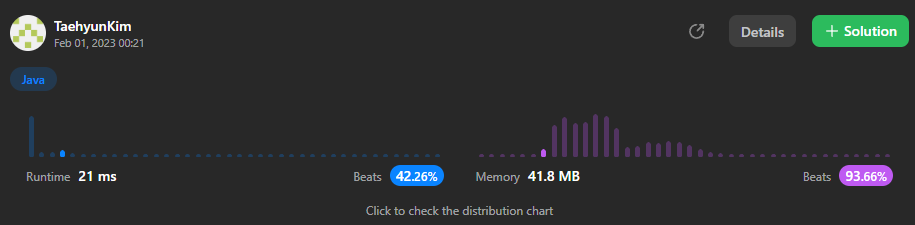

### Easy || 100% || Fully Explained || C++, Java, Python, JavaScript, Python3 || Sliding Window
---

In [4]:
// Time Complexity :  O(n)
// Space Complexity : O(1)
class WindowSolution {
    public int characterReplacement(String s, int k) {
        // Make an array of size 26...
        int[] arr = new int[26];
        // Initialize largestCount, maxlen & beg pointer...
        int largestCount = 0, beg = 0, maxlen = 0;
        // Traverse all characters through the loop...
        for(int end = 0; end < s.length(); end ++){
            arr[s.charAt(end) - 'A']++;
            // Get the largest count of a single, unique character in the current window...
            largestCount = Math.max(largestCount, arr[s.charAt(end) - 'A']);
            // We are allowed to have at most k replacements in the window...
            // So, if max character frequency + distance between beg and end is greater than k...
            // this means we have considered changing more than k charactres. So time to shrink window...
            // Then there are more characters in the window than we can replace, and we need to shrink the window...
            if(end - beg + 1 - largestCount > k){     // The main equation is: end - beg + 1 - largestCount...
                arr[s.charAt(beg) - 'A']--;
                beg ++;
            }
            // Get the maximum length of repeating character...
            maxlen = Math.max(maxlen, end - beg + 1);     // end - beg + 1 = size of the current window...
        }
        return maxlen;      // Return the maximum length of repeating character...
    }
}

In [5]:
WindowSolution windowSolution = new WindowSolution();
String s = "AABABBA";
int k = 1;

/* Measure execution time */
Instant start = Instant.now();
int answer = windowSolution.characterReplacement(s, k);
Instant finish = Instant.now();

answer

4

In [6]:
Duration.between(start, finish).toMillis();

35